## Start with Quantitative Data

For now, we have only worked with qualitative data but Radarly API gives you the opportunity to perform many different computations on quantitative data. For example, you can retrieve the number of engagement actions on a set of publications (without a loop to sum all statistics in ``score``, or certain statistics about the publication's sentiment. We will explore here several objects defined by ``radarly-py`` to retrieve these statistics.

Most of statistic objects defined by ``radarly-py`` are built to be easily parsed with ``pandas`` (simply with ``pd.DataFrame(my_object)`` where ``my_object`` is an object defined by this package). Using ``pandas`` is not a requirement to work with quantitative data but it is strongly recommended. 

In [1]:
from datetime import datetime
from radarly import RadarlyApi
from radarly.project import Project
import pandas as pd
from matplotlib import pyplot as plt

RadarlyApi.init()

project = Project.find(pid=2989)
project

<Project.pid=2989.label=Luxury [OFFICIAL DEMO]>

Let's define some variables which will be useful later to build our payload.

In [2]:
watch_dashboard = project.dashboards[0]
watch_dashboard

<Dashboard.id=10389.label=1. Watch Brands>

In [3]:
tag = project['$.tags(type=custom)']
tag

<Tag.label=Reviews.type=custom>

### Distribution

The ``Distribution`` object allows you to have the distribution over time of some metrics: number of document (with or without repost), number of impressions or number of engagement actions.

In [4]:
from radarly.parameters import DistributionParameter
from radarly.constants import METRIC, INTERVAL

To get data, we will use the ``get_distribution`` method of a project. You can also use the ``fetch`` class method of ``Distribution`` defined in ``radarly.distribution`` (in this case, you must specify the project's id as first argument: ``Distribution.fetch(2989, payload)``).

The payload to send to the API (which is the first argument of the method) can be a dictionary you build yourself or an instance of ``DistributionParameter`` defined in ``radarly.parameters``. This payload is useful to specify on which set of publications you want to work and the format of data you retrieve (you can, for example, group the statistics by month instead of day).

In [5]:
distri_param = DistributionParameter() \
    .publication_date(datetime(2018, 1, 1), datetime(2018, 4, 30)) \
    .focuses(include=watch_dashboard.focuses) \
    .metrics(METRIC.DOC, METRIC.ENGAGEMENT) \
    .interval(INTERVAL.DAY) \
    .flag(retweet=False)

distribution = project.get_distribution(distri_param)
distribution

<Distribution.length=119>

The ``Distribution`` object returns a distribution over time of the metrics asked. As announced, the ``Distribution`` object can be parsed with ``pandas``.

In [6]:
distribution = pd.DataFrame(distribution)
distribution.set_index('date', inplace=True)
distribution.head()

,doc,engagement
date,,
2018-01-01 00:00:00+00:00,10808,976313
2018-01-02 00:00:00+00:00,11810,729884
2018-01-03 00:00:00+00:00,11178,734651
2018-01-04 00:00:00+00:00,10715,871349
2018-01-05 00:00:00+00:00,12532,995183


Let's plot this distribution.

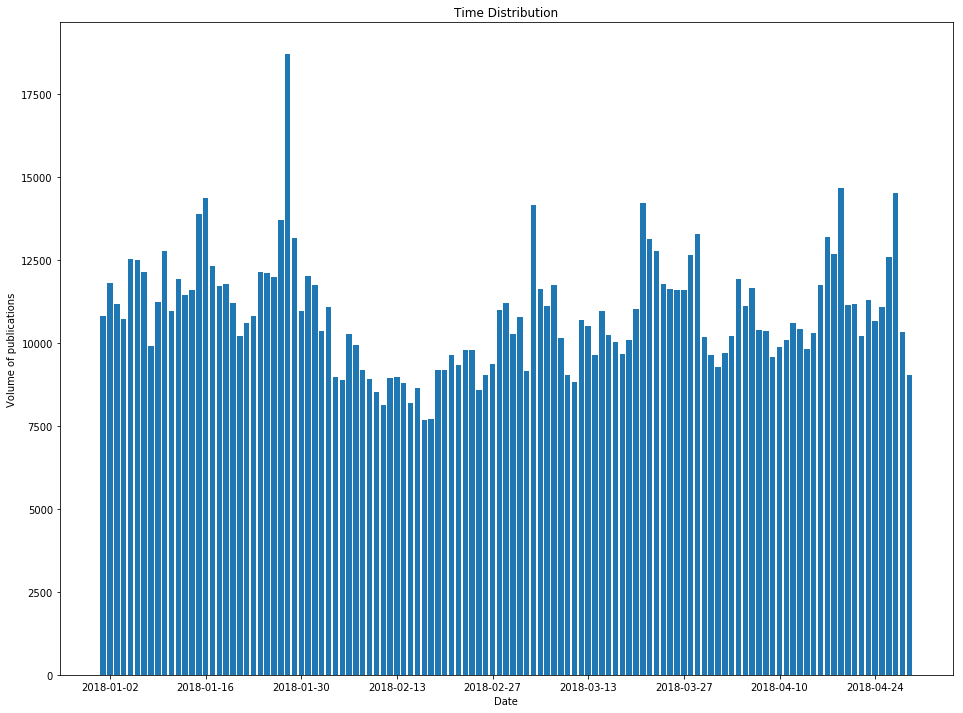

In [7]:
plt.figure(figsize=(16, 12))
plt.bar(distribution.index, distribution.doc)
plt.xlabel('Date'), plt.ylabel('Volume of publications')
plt.title('distribution over time')
plt.show()

### Analytics

The ``Analytics`` object has some similarities with the ``Distribution`` object: it allows you to have distribution over time of the same metrics. But ``Analytics`` allows you to have more details; for example, you can get the distribution by platform, the tones of publications... To get this object, you must use the ``get_analytics`` method of a project.

In [8]:
from radarly.parameters import AnalyticsParameter
from radarly.constants import ANALYTICS_FIELD, METRIC

The payload sent to the API can be built with ``AnalyticsParameter`` defined in ``radarly.parameters``. It is similar to ``DistributionParameter`` but has some additional methods; for example, the ``fields`` method allows you to specify all the fields which must be computed.

In [9]:
fields = [
    ANALYTICS_FIELD.CATEGORIES, ANALYTICS_FIELD.PLATFORMS, ANALYTICS_FIELD.FOCUSES,
    ANALYTICS_FIELD.OCCUPATIONS
]
stat_param = AnalyticsParameter() \
    .publication_date(datetime(2018, 1, 1), datetime(2018, 4, 30)) \
    .focuses(include=watch_dashboard.focuses) \
    .fctx(*watch_dashboard.focuses) \
    .fields(*fields) \
    .flag(retweet=False) \
    .metrics(METRIC.ENGAGEMENT, METRIC.DOC)

stats = project.get_analytics(stat_param)
stats

<Analytics.fields=['total', 'counts', 'platforms', 'categories', 'focuses', 'occupations']>

The ``Analytics`` object is built of several independant parts, one for each field (the ``total`` and ``counts`` fields are returned without being asked). Each field can be transformed into a DataFrame (if you transform directly the ``Analytics`` object, the result will not be nicely displayed).

In [10]:
occupations = pd.DataFrame(stats['occupations'])
occupations.head()

abbe  academician  accordionist  \
doc 2018-01-01 00:00:00+00:00   NaN          NaN           NaN   
    2018-01-02 00:00:00+00:00   NaN          NaN           NaN   
    2018-01-03 00:00:00+00:00   NaN          NaN           NaN   
    2018-01-04 00:00:00+00:00   NaN          NaN           NaN   
    2018-01-05 00:00:00+00:00   1.0          NaN           NaN   

                               account executive  accountant  acrobat  actor  \
doc 2018-01-01 00:00:00+00:00                NaN         4.0      NaN     21   
    2018-01-02 00:00:00+00:00                NaN         1.0      NaN     10   
    2018-01-03 00:00:00+00:00                NaN         2.0      NaN      6   
    2018-01-04 00:00:00+00:00                1.0         NaN      NaN     13   
    2018-01-05 00:00:00+00:00                NaN         3.0      NaN     14   

                               actuary  advertising person  \
doc 2018-01-01 00:00:00+00:00      NaN                 NaN   
    2018-01-02 00:00:00+00:00      NaN                 NaN   
    2018-01-03 00:00:00+00:00      NaN                 NaN   
    2018-01-04 00:00:00+00:00      NaN                 NaN   
    2018-01-05 00:00:00+00:00      1.0                 NaN   

                               advertising photographer    ...      webmaster  \
doc 2018-01-01 00:00:00+00:00                       NaN    ...            1.0   
    2018-01-02 00:00:00+00:00                       NaN    ...            NaN   
    2018-01-03 00:00:00+00:00                       NaN    ...            NaN   
    2018-01-04 00:00:00+00:00                       NaN    ...            NaN   
    2018-01-05 00:00:00+00:00                       NaN    ...            NaN   

                               wedding planner  welder  wet nurse  winemaker  \
doc 2018-01-01 00:00:00+00:00              NaN     NaN        NaN        1.0   
    2018-01-02 00:00:00+00:00              NaN     NaN        NaN        NaN   
    2018-01-03 00:00:00+00:00              NaN     NaN        NaN        1.0   
    2018-01-04 00:00:00+00:00              NaN     NaN        NaN        NaN   
    2018-01-05 00:00:00+00:00              NaN     NaN        NaN        NaN   

                               wire drawer  woman composer  woman of letters  \
doc 2018-01-01 00:00:00+00:00          NaN             NaN               NaN   
    2018-01-02 00:00:00+00:00          NaN             NaN               NaN   
    2018-01-03 00:00:00+00:00          NaN             NaN               NaN   
    2018-01-04 00:00:00+00:00          NaN             NaN               NaN   
    2018-01-05 00:00:00+00:00          NaN             NaN               NaN   

                               writer  zoologist  
doc 2018-01-01 00:00:00+00:00      32        NaN  
    2018-01-02 00:00:00+00:00      28        NaN  
    2018-01-03 00:00:00+00:00      16        NaN  
    2018-01-04 00:00:00+00:00      27        NaN  
    2018-01-05 00:00:00+00:00      23        NaN  

[5 rows x 876 columns]

In [11]:
focuses = pd.DataFrame(stats['focuses'])
focuses.head()

Breitling  Jaeger-LeCoultre  Omega  Rolex  \
doc 2018-01-01 00:00:00+00:00        746               553    646   8022   
    2018-01-02 00:00:00+00:00        686               415    719   9083   
    2018-01-03 00:00:00+00:00        645               422    618   8960   
    2018-01-04 00:00:00+00:00        695               457    623   8253   
    2018-01-05 00:00:00+00:00        867               678    633   9725   

                               Tag Heuer  
doc 2018-01-01 00:00:00+00:00       1400  
    2018-01-02 00:00:00+00:00       1293  
    2018-01-03 00:00:00+00:00       1095  
    2018-01-04 00:00:00+00:00       1160  
    2018-01-05 00:00:00+00:00       1208

In [12]:
categories = pd.DataFrame(stats['categories'])
categories.head()

business.market  business.transport  \
doc 2018-01-01 00:00:00+00:00              180                 2.0   
    2018-01-02 00:00:00+00:00              162                 NaN   
    2018-01-03 00:00:00+00:00              108                 1.0   
    2018-01-04 00:00:00+00:00              139                 NaN   
    2018-01-05 00:00:00+00:00              144                 NaN   

                               business.your-money  ecology.biodiversity  \
doc 2018-01-01 00:00:00+00:00                  3.0                    35   
    2018-01-02 00:00:00+00:00                  3.0                    33   
    2018-01-03 00:00:00+00:00                  4.0                   130   
    2018-01-04 00:00:00+00:00                  3.0                    30   
    2018-01-05 00:00:00+00:00                  9.0                    37   

                               ecology.climatic  ecology.farming  \
doc 2018-01-01 00:00:00+00:00               NaN              NaN   
    2018-01-02 00:00:00+00:00               1.0              4.0   
    2018-01-03 00:00:00+00:00               NaN              1.0   
    2018-01-04 00:00:00+00:00               NaN              NaN   
    2018-01-05 00:00:00+00:00               NaN              NaN   

                               ecology.pollution-recycling  \
doc 2018-01-01 00:00:00+00:00                          1.0   
    2018-01-02 00:00:00+00:00                          NaN   
    2018-01-03 00:00:00+00:00                          1.0   
    2018-01-04 00:00:00+00:00                          NaN   
    2018-01-05 00:00:00+00:00                          NaN   

                               entertainment.arts  entertainment.comics  \
doc 2018-01-01 00:00:00+00:00                 2.0                   NaN   
    2018-01-02 00:00:00+00:00                 3.0                   1.0   
    2018-01-03 00:00:00+00:00                 6.0                   NaN   
    2018-01-04 00:00:00+00:00                 NaN                   NaN   
    2018-01-05 00:00:00+00:00                 1.0                   NaN   

                               entertainment.movies  \
doc 2018-01-01 00:00:00+00:00                    21   
    2018-01-02 00:00:00+00:00                    18   
    2018-01-03 00:00:00+00:00                    33   
    2018-01-04 00:00:00+00:00                    89   
    2018-01-05 00:00:00+00:00                    56   

                                          ...              sport.ski-jumping  \
doc 2018-01-01 00:00:00+00:00             ...                            NaN   
    2018-01-02 00:00:00+00:00             ...                            NaN   
    2018-01-03 00:00:00+00:00             ...                            NaN   
    2018-01-04 00:00:00+00:00             ...                            NaN   
    2018-01-05 00:00:00+00:00             ...                            NaN   

                               sport.snowboard  sport.surf  sport.tennis  \
doc 2018-01-01 00:00:00+00:00              NaN         NaN            11   
    2018-01-02 00:00:00+00:00              NaN         NaN            16   
    2018-01-03 00:00:00+00:00              NaN         NaN            22   
    2018-01-04 00:00:00+00:00              NaN         NaN            15   
    2018-01-05 00:00:00+00:00              NaN         NaN            10   

                               sport.volleyball  sport.windsurf  \
doc 2018-01-01 00:00:00+00:00               NaN             NaN   
    2018-01-02 00:00:00+00:00               NaN             NaN   
    2018-01-03 00:00:00+00:00               NaN             NaN   
    2018-01-04 00:00:00+00:00               NaN             NaN   
    2018-01-05 00:00:00+00:00               NaN             NaN   

                               technology.computer  technology.mobile-device  \
doc 2018-01-01 00:00:00+00:00                  NaN                        36   
    2018-01-02 00:00:00+00:00                  9.0                        25   
    2018

### Pivot Table

Contrary to previous objects, a ``PivotTable`` doesn't store a distribution over time but allows you to cross data.

In [13]:
from radarly.parameters import PivotParameter
from radarly.constants import METRIC

You can use either the ``get_pivot_table`` method of a project or the ``fetch`` class method of the ``PivotTable`` defined in ``radarly.pivottable``.

<div class="alert alert-info">
If you use the ``fetch`` class method, you must specify additional keywords arguments in order to allow the right parsing of the table. Check the [documentation of this method](https://api.linkfluence.com/python/sourcecode/radarly.pivottable.html#radarly.pivottable.PivotTable.fetch) for more information.
</div>

In [14]:
pivot_param = PivotParameter(pivot='tones', against='focuses') \
    .publication_date(datetime(2018, 3, 1), datetime(2018, 4, 30)) \
    .focuses(include=watch_dashboard.focuses) \
    .fctx(*watch_dashboard.focuses) \
    .metrics(METRIC.DOC, METRIC.IMPRESSION, METRIC.ENGAGEMENT) \
    .flag(retweet=False)

table = project.get_pivot_table(pivot_param)
table

<PivotTable.pivot=tones.against=focuses>

In [15]:
table = pd.DataFrame(table)
table

Breitling  Jaeger-LeCoultre      Omega       Rolex  \
doc        mixed           714               375        703       13347   
           negative       1130              3465        476       29872   
           neutral       19104             18186      14557      198342   
           positive      28636             14981      22181      255994   
engagement mixed         96443             28592     106033     1322050   
           negative      29856             98194      46732      631283   
           neutral      668595            219510     620068     8170502   
           positive    3754248           1120113    1902008    33099334   
impression mixed       4074750           1871178    5834318    85220085   
           negative    2920348          17899170    1922605   342875199   
           neutral   461617006         109662207   73803914  3066526252   
           positive  299672782         263389966  154001599  3081210619   

                      Tag Heuer  
doc        mixed           1198  
           negative        1146  
           neutral        31394  
           positive       41875  
engagement mixed         119532  
           negative       57447  
           neutral       688395  
           positive     6971311  
impression mixed        7925432  
           negative    15930864  
           neutral   1019981739  
           positive  1769352094

### Cloud

The ``Cloud`` object stores, for each field, the most recurrent keywords (sorted according to certain metrics). 

In [16]:
from radarly.constants import CLOUD_FIELD
from radarly.parameters import CloudParameter

In [17]:
cloud_fields = [
    CLOUD_FIELD.KEYWORDS, CLOUD_FIELD.MENTIONS,
    CLOUD_FIELD.NAMED_ENTITIES, CLOUD_FIELD.HASHTAGS
]
cloud_param = CloudParameter() \
    .timezone('Europe/Paris') \
    .metrics(METRIC.DOC, METRIC.IMPRESSION, METRIC.REACH) \
    .fields(*cloud_fields) \
    .publication_date(datetime(2018, 3, 1), datetime(2018, 4, 30))

clouds = project.get_cloud(cloud_param)
clouds

<Cloud.fields=['emoji_charts', 'mentions', 'emoji_annotations', 'keywords', 'named_entities', 'hashtags', 'affects']>

In [18]:
mentions = pd.DataFrame(clouds['mentions'])
mentions.T.head()

,doc,impression,reach
007,158,435285,34807
adukuru,144,285202,22801
akandeoj,2294,2337149,186969
akinwunmi_ambode,2337,2340627,187243
alekswatches,505,41815115,6272256
